In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as stdsc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('C:\\Users\\crist\\Downloads\\Churn.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
x = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']
x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=True)
xtrain,xtest,ytrain,ytest = tts(x, y, test_size=0.2, random_state=42)

In [12]:
scaler = stdsc()
xtrs = scaler.fit_transform(xtrain)
xtss = scaler.transform(xtest)

In [13]:
model = rfc(n_estimators=100, random_state=42)
model.fit(xtrs, ytrain)

RandomForestClassifier(random_state=42)

In [14]:
ypred = model.predict(xtss)
acc = accuracy_score(ytest, ypred)
classes = classification_report(ytest, ypred)

print("Accuracy:",acc*100,"%")
print("Classification Report:\n", classes)

Accuracy: 86.65 %
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
model = rfc(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [17]:
grid_search.fit(xtrs, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [18]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.866


In [19]:
model = rfc(n_estimators=100, random_state=42)
model.fit(xtrs, ytrain)

RandomForestClassifier(random_state=42)

In [20]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

In [21]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [22]:
top_n = 10
print(f"Top {top_n} Features:")
print(feature_importance_df.head(top_n))

Top 10 Features:
              Feature  Importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421


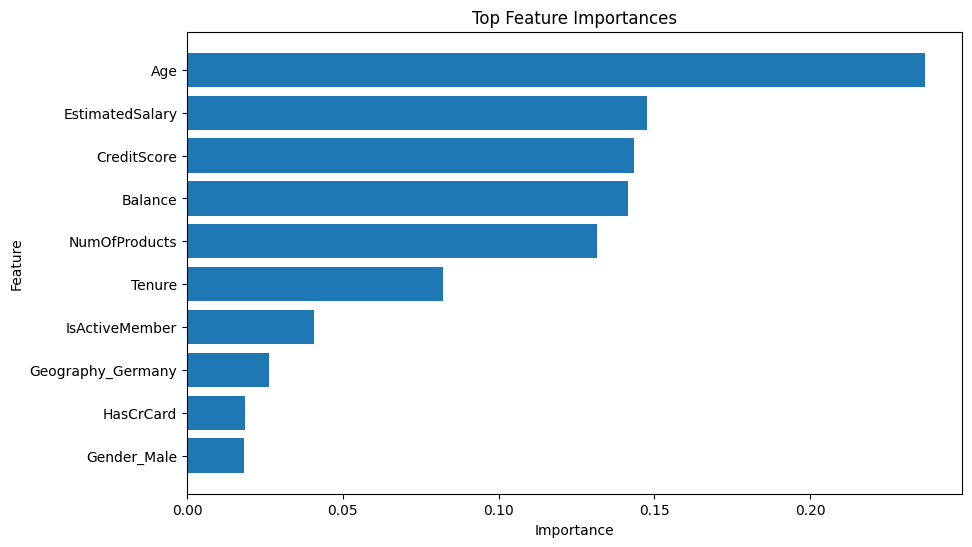

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

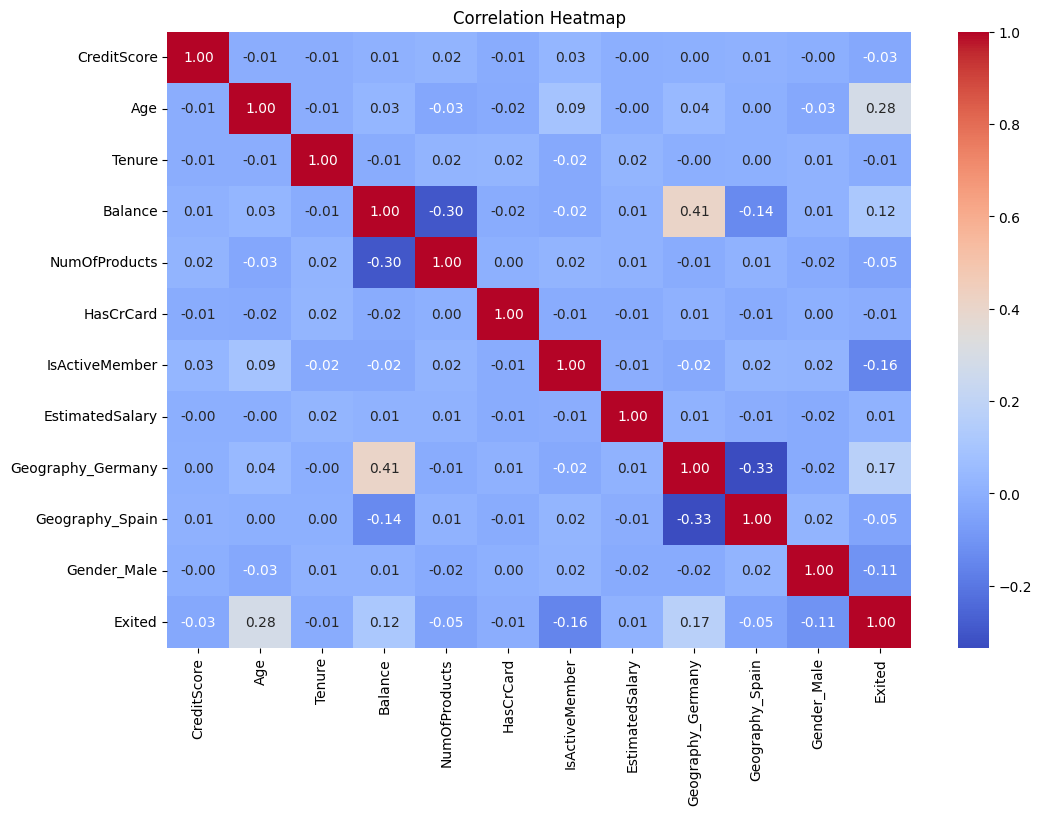

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train from previous steps

# Concatenate the training features and target variable for correlation analysis
correlation_data = pd.concat([xtrain, ytrain], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
churn_correlations = correlation_matrix['Exited'].drop('Exited')  # Exclude the target itself
churn_correlations = churn_correlations.sort_values(ascending=False)

# Print the correlations
print("Correlations with Churn:")
print(churn_correlations)

Correlations with Churn:
Age                  0.283173
Geography_Germany    0.169537
Balance              0.118418
EstimatedSalary      0.010889
HasCrCard           -0.006471
Tenure              -0.013352
CreditScore         -0.029307
Geography_Spain     -0.047172
NumOfProducts       -0.051009
Gender_Male         -0.106478
IsActiveMember      -0.156560
Name: Exited, dtype: float64


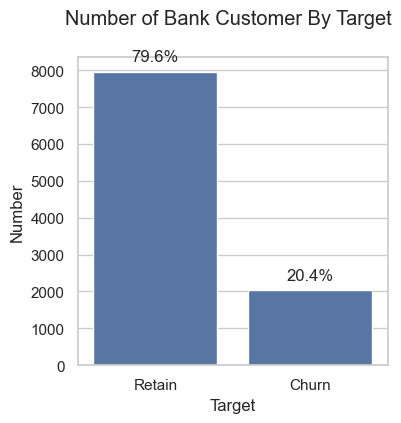

In [28]:
sns.set_theme(style="whitegrid")

chart = 'Number of Bank Customer By Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)
g = sns.countplot(x='Exited', data=df)
g.set(ylabel='Number', xlabel='Target')
plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)
total = len(df['Exited'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

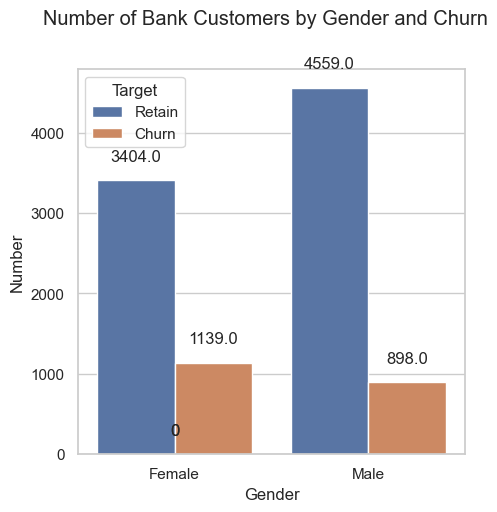

In [29]:
sns.set_theme(style="whitegrid")

chart = 'Number of Bank Customers by Gender and Churn'

plt.figure(figsize=(5, 5))
plt.suptitle(f'{chart}', y=1)

g = sns.countplot(x='Gender', hue='Exited', data=df)

g.set(ylabel='Number', xlabel='Gender')
total = len(df)
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 200),
               ha='center', va='bottom', fontsize=12)
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=["Retain", "Churn"], title="Target")

plt.show()